In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from helpers import get_dataset_range
from math import floor

In [2]:
# NOAA classifies 2015-16 and 2010-11 as strong or very strong events
# of el nino and la nina, respectively
nino_data = get_dataset_range(2015, 2016)
nina_data = get_dataset_range(2010, 2011)

# all non-strong classified data
interval1_data = get_dataset_range(2008, 2009)
interval2_data = get_dataset_range(2012, 2014)
interval3_data = get_dataset_range(2017, 2022)

In [3]:
# split relevant states into climate regions as defined:
# https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions
regions = {
    'northwest': ['Washington', 'Oregon', 'Idaho'],
    'west': ['California', 'Nevada'],
    'southwest': ['Utah', 'New Mexico', 'Wyoming', 'Arizona'],
    'south': ['Texas', 'Oklahoma', 'Louisiana', 'Arkansas', 'Mississippi'],
    'southeast': ['Alabama', 'Georgia', 'Florida', 'North Carolina', 'South Carolina', 'Virginia'],
    'midwest': ['Minnesota', 'Wisconsin', 'Michigan', 'Iowa'],
    'ohio': ['Ohio', 'Missouri', 'Tennessee', 'Kentucky', 'West Virginia', 'Indiana', 'Illinois']
    # exclude northeast
}
# too lazy to caps manually
for region in regions.keys():
    regions[region] = [r.upper() for r in regions[region]]

def count_events(dataset_list):
    # to count events in each region
    region_counts = { 'northwest': 0, 'west': 0, 'southwest': 0, 'south': 0, 
                    'southeast': 0, 'midwest': 0, 'ohio': 0 }
    for x in dataset_list.values():
        for region in regions.keys():
            relevant = x[np.isin(x['STATE'], regions[region])]
            region_counts[region] += len(relevant)
    return region_counts

def single_count_events(dataset):
    region_counts = { 'northwest': 0, 'west': 0, 'southwest': 0, 'south': 0, 
                    'southeast': 0, 'midwest': 0, 'ohio': 0 }
    for region in regions.keys():
        relevant = dataset[np.isin(dataset['STATE'], regions[region])]
        region_counts[region] += len(relevant)
    return region_counts
        

In [4]:
nino_counts = count_events(nino_data)
print(nino_counts)
nina_counts = count_events(nina_data)
print(nina_counts)

{'northwest': 2209, 'west': 2914, 'southwest': 5685, 'south': 18073, 'southeast': 16543, 'midwest': 10732, 'ohio': 21179}
{'northwest': 1935, 'west': 2108, 'southwest': 5689, 'south': 22196, 'southeast': 22050, 'midwest': 13834, 'ohio': 28981}


In [5]:
interval1_counts = count_events(interval1_data)
interval2_counts = count_events(interval2_data)
interval3_counts = count_events(interval3_data)
interval_num_yrs = 2+3+6
interval_counts = { 'northwest': 0, 'west': 0, 'southwest': 0, 'south': 0, 
                    'southeast': 0, 'midwest': 0, 'ohio': 0 }
for region in interval_counts.keys():
    year_weight = 2 / interval_num_yrs
    interval_counts[region] = round((interval1_counts[region] + interval2_counts[region] + interval3_counts[region]) * year_weight, 2)

print(interval_counts)

{'northwest': 2363.45, 'west': 4048.0, 'southwest': 6425.82, 'south': 19387.09, 'southeast': 16794.0, 'midwest': 12594.36, 'ohio': 21577.09}


In [6]:
all_years_data = get_dataset_range(2008, 2022)
formatted_data = interval_counts = { 'northwest': [], 'west': [], 'southwest': [], 'south': [], 
                    'southeast': [], 'midwest': [], 'ohio': [] }
for year in all_years_data.keys():
    counts = single_count_events(all_years_data[year])
    for region in regions.keys():
        formatted_data[region].append(counts[region])

formatted_df = pd.DataFrame(formatted_data, index = [year for year in all_years_data.keys()])
formatted_df

,northwest,west,southwest,south,southeast,midwest,ohio
2008,1217,1446,1944,10923,10651,9157,13410
2009,916,1062,1835,11186,8807,4936,10230
2010,1020,1110,2765,8052,9145,7370,13107
2011,915,998,2924,14144,12905,6464,15874
2012,1286,1130,3028,10452,10325,6209,12613
2013,832,947,3828,10069,6512,6494,10133
2014,1224,1426,3614,8916,7402,6869,10076
2015,1292,1397,2775,10193,7834,5035,11550
2016,917,1517,2910,7880,8709,5697,9629
2017,1464,2161,3162,8620,7815,5230,9826


In [7]:
aughts_data = get_dataset_range(2000, 2011)
formatted_data = interval_counts = { 'northwest': [], 'west': [], 'southwest': [], 'south': [], 
                    'southeast': [], 'midwest': [], 'ohio': [] }
for year in aughts_data.keys():
    counts = single_count_events(aughts_data[year])
    for region in regions.keys():
        formatted_data[region].append(counts[region])
aughts_formatted_df = pd.DataFrame(formatted_data, index = [year for year in aughts_data.keys()])
aughts_formatted_df.head()

C:\Users\fu5i1\Documents\GitHub\team1\helpers.py:7: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"resources/stormevents_{i}.csv")


,northwest,west,southwest,south,southeast,midwest,ohio
2000,695,1025,1243,8988,8697,5429,9691
2001,864,1299,1017,8441,6160,6624,8391
2002,1024,1108,1318,7470,7727,5282,9440
2003,992,987,1485,8183,8664,4477,11547
2004,932,958,1264,8368,7186,6324,9615


In [32]:
# take the mean for each region over the years to establish a "baseline"
baseline = { 'northwest': 0, 'west': 0, 'southwest': 0, 'south': 0, 
                    'southeast': 0, 'midwest': 0, 'ohio': 0 }
for region in baseline.keys():
    baseline[region] = int(round(aughts_formatted_df[region].mean(), 0))
baseline

{'northwest': 998,
 'west': 1111,
 'southwest': 1699,
 'south': 9340,
 'southeast': 8625,
 'midwest': 6322,
 'ohio': 10960}

In [31]:
print(formatted_df.loc[2013, :].sum())
np.sum([x for x in baseline.values()])

38815


39055

In [34]:
# compare the very strong event years to that baseline to determine if there is a significant difference
# year categorizations found at: https://ggweather.com/enso/oni.htm
# using data from the same organization that put together the storms dataset
v_strong_nino_yr_counts = formatted_df.loc[2015, :]
strong_nina_yr_counts = formatted_df.loc[2011, :]
neither_yr_counts = formatted_df.loc[2013, :]

# method to compare one year's storm counts per region to a baseline
# established using the mean for the 2000-2010 decade;
# comparison uses chi2 to determine statistical significance
def chi2_count_compare(yr_counts):
    names = [x for x in baseline.keys()]
    
    # scale baseline region storm counts to match year being compared to
    base_counts = [ct for ct in baseline.values()]
    scale = yr_counts.sum() / np.sum(base_counts)
    for i in range(len(base_counts)):
        base_counts[i] = floor(base_counts[i] * scale)
    
    # ensure that counts match exactly so we can use chi^2
    idx = 0
    while np.sum(base_counts) < yr_counts.sum():
        base_counts[idx] += 1
        if idx == len(names) - 1:
            idx = 0
        else:
            idx += 1
    
    # obtain critical value, where degrees of freedom = number of regions - 1
    critical_value = stats.chi2.ppf(q = 0.95, df = len(names)-1)
    print(f"Critical Value: {critical_value}")

    # chi2 method and clean output
    chi2 = stats.chisquare(base_counts, [x for x in yr_counts])
    print(f"Chi-square: {chi2}")
    comparison = round(chi2[0], 2)
    is_significant = comparison > critical_value
    critical_value = round(critical_value, 2)
    if is_significant:
        print(f"Since the chi-square value ({comparison}) exceeds the critical" +
                f" value ({critical_value}), the results are statistically significant")
    else:
        print(f"Since the chi-square value ({comparison}) does not exceed the critical" +
                f" value ({critical_value}), the results are not statistically significant")
    
print("Very Strong El Nino Chi-Square Comparison")
chi2_count_compare(v_strong_nino_yr_counts)

Very Strong El Nino Chi-Square Comparison
Critical Value: 12.591587243743977
Chi-square: Power_divergenceResult(statistic=1080.7647092366285, pvalue=3.0262510330833704e-230)
Since the chi-square value (1080.76) exceeds the critical value (12.59), the results are statistically significant


In [35]:
print("Strong La Nina Chi-Square Comparison")
chi2_count_compare(strong_nina_yr_counts)

Strong La Nina Chi-Square Comparison
Critical Value: 12.591587243743977
Chi-square: Power_divergenceResult(statistic=1668.9734488801773, pvalue=0.0)
Since the chi-square value (1668.97) exceeds the critical value (12.59), the results are statistically significant


In [36]:
print("Neutral Year Chi-Square Comparison")
chi2_count_compare(neither_yr_counts)

Neutral Year Chi-Square Comparison
Critical Value: 12.591587243743977
Chi-square: Power_divergenceResult(statistic=2028.4451686425396, pvalue=0.0)
Since the chi-square value (2028.45) exceeds the critical value (12.59), the results are statistically significant


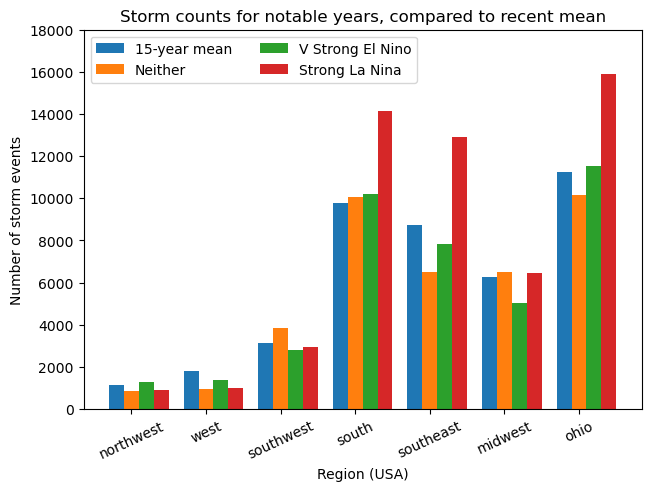

In [12]:
labels = ["15-year mean", "Neither", "V Strong El Nino", "Strong La Nina"]
sets = [baseline.values(), neither_yr_counts, v_strong_nino_yr_counts, strong_nina_yr_counts]
region_tup = tuple([x for x in baseline.keys()])
counts = {}
for i in range(len(labels)):
    counts[labels[i]] = tuple([y for y in sets[i]])

x_ax = np.arange(len(region_tup))
width = 0.2
mult = 0

fig, ax = plt.subplots(layout="constrained")
for set_label, region_counts in counts.items():
    offset = width * mult
    rects = ax.bar(x_ax + offset, region_counts, width, label=set_label)
    mult += 1

ax.set_xticks(x_ax + width, region_tup)
plt.xticks(rotation=25)
ax.legend(loc='upper left', ncols=2)
plt.xlabel("Region (USA)")
plt.ylabel("Number of storm events")
plt.title("Storm counts for notable years, compared to recent mean")
ax.set_ylim(0, 18000)
plt.show()

In [13]:
# data again from: https://ggweather.com/enso/oni.htm
oni_ratings = {
    "2008-2009": "WL", "2009-2010": "ME", "2010-2011": "SL", "2011-2012": "ML",
    "2012-2013": "", "2013-2014": "", "2014-2015": "WE", "2015-2016": "VSE",
    "2016-2017": "WL", "2017-2018": "WL", "2018-2019": "WE",  "2019-2020": "",
    "2020-2021": "ML", "2021-2022": "ML" 
}
# translate strength of weather pattern to discreet values
label_to_val_dict = {
    "VSE": 4, "SE": 3, "ME": 2, "WE": 1,
    "": 0, "WL": -1, "ML": -2, "SL": -3
}
# apply translation to each year pairing, then average, to get value per year
# instead of per season
year_ratings = []
year_ratings.append(label_to_val_dict[oni_ratings["2008-2009"]]) # first year
for i in range(2008, 2021):
    key = str(i) + "-" + str(i+1)
    key2 = str(i+1) + "-" + str(i+2)
    val = label_to_val_dict[oni_ratings[key]] + label_to_val_dict[oni_ratings[key2]] / 2
    year_ratings.append(val)
year_ratings.append(label_to_val_dict[oni_ratings["2021-2022"]]) # last year

# even with absolute value, too few entries per rating to perform ANOVA
# could integrate full 70ish year dataset, but not enough time;
# conclusion: ANOVA not very applicable for this task
# other analyses ruled out because question doesn't fit their application(s)
abs_ratings = np.absolute(year_ratings)
ratings_df = formatted_df.copy()
ratings_df["ONI_rating"] = year_ratings
ratings_df["ONI_rating_abs"] = abs_ratings
ratings_df.head()

,northwest,west,southwest,south,southeast,midwest,ohio,ONI_rating,ONI_rating_abs
2008,1217,1446,1944,10923,10651,9157,13410,-1.0,1.0
2009,916,1062,1835,11186,8807,4936,10230,0.0,0.0
2010,1020,1110,2765,8052,9145,7370,13107,0.5,0.5
2011,915,998,2924,14144,12905,6464,15874,-4.0,4.0
2012,1286,1130,3028,10452,10325,6209,12613,-2.0,2.0


In [14]:
def compile_region_counts_per_rating(should_use_abs):
    relevant_col = ''
    if should_use_abs:
        relevant_col = "ONI_rating_abs"
    else:
        relevant_col = "ONI_rating"
    grouped = ratings_df.groupby([relevant_col]).mean()
    return grouped
    
# attempted here to instead use ONI_rating as a scale,
# and try to correlate it with storm frequency in different regions
# tried with nina/nino treated as opposite ends of a scale and
# just the strength of the year's nino/nina
with_abs = compile_region_counts_per_rating(True)
no_abs = compile_region_counts_per_rating(False)
with_abs.head()

,northwest,west,southwest,south,southeast,midwest,ohio,ONI_rating
ONI_rating_abs,,,,,,,,
0.0,874.000000,1004.500000,2831.500000,10627.5,7659.500000,5715.000000,10181.500000,0.000000
0.5,1080.000000,1548.666667,3431.666667,8372.0,8558.666667,6966.333333,11239.333333,0.166667
1.0,1266.333333,2223.666667,2659.000000,9684.0,9209.000000,7055.333333,11481.333333,-0.333333
1.5,1464.000000,2161.000000,3162.000000,8620.0,7815.000000,5230.000000,9826.000000,-1.500000
2.0,1303.000000,2308.500000,3458.500000,10880.0,9226.000000,6274.000000,12170.500000,-2.000000


In [15]:
region_corr = { 'northwest': 0, 'west': 0, 'southwest': 0, 'south': 0, 
                    'southeast': 0, 'midwest': 0, 'ohio': 0 }
for region in region_corr.keys():
    region_corr[region] = round(stats.pearsonr(no_abs.index, no_abs[region])[0],2)

region_corr_abs = { 'northwest': 0, 'west': 0, 'southwest': 0, 'south': 0, 
                    'southeast': 0, 'midwest': 0, 'ohio': 0 }
for region in region_corr_abs.keys():
    region_corr_abs[region] = round(stats.pearsonr(with_abs.index, with_abs[region])[0],2)

# resulting correlation values for each region for both attempted methods;
# values are unconvincing to say the least
print(region_corr)
print(region_corr_abs)

{'northwest': -0.04, 'west': -0.21, 'southwest': -0.36, 'south': -0.52, 'southeast': -0.4, 'midwest': -0.14, 'ohio': -0.37}
{'northwest': -0.17, 'west': -0.03, 'southwest': 0.05, 'south': 0.34, 'southeast': 0.52, 'midwest': -0.25, 'ohio': 0.42}


In [16]:
# thoroughly weak overall correlation
print(np.mean([x for x in region_corr.values()]))
print(np.mean([x for x in region_corr_abs.values()]))

-0.2914285714285714
0.1257142857142857


In [17]:
abs_sums = []
for i in with_abs.index:
    abs_sums.append(with_abs.loc[i,:].sum())
scale_sums = []
for i in no_abs.index:
    scale_sums.append(no_abs.loc[i,:].sum())

print(round(stats.pearsonr(with_abs.index, abs_sums)[0], 2))
print(round(stats.pearsonr(no_abs.index, scale_sums)[0], 2))

0.4
-0.56


In [18]:
scale_sums = []
for i in no_abs.index:
    scale_sums.append(no_abs.loc[i,:].sum())
    
round(stats.pearsonr(no_abs.index, scale_sums)[0],2)

-0.56

R squared: 0.15701767072361986
Pearson-R: 0.4


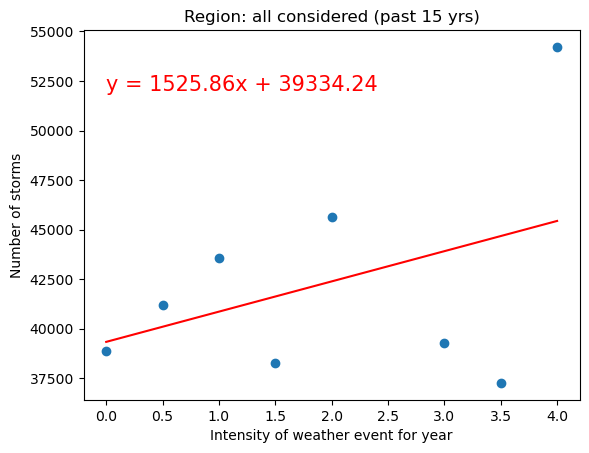

In [19]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(with_abs.index, abs_sums)
regress_values = with_abs.index * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(with_abs.index, abs_sums)

# Plot regression line
plt.plot(with_abs.index,regress_values,"r-")
plt.annotate(line_eq,(0,52000),fontsize=15,color="red")
# Print r square value
print(f"R squared: {rvalue**2}")
# Print pearsonr
print(f"Pearson-R: {(round(stats.pearsonr(with_abs.index, abs_sums)[0], 2))}")
plt.ylabel("Number of storms")
plt.xlabel("Intensity of weather event for year")
plt.title("Region: all considered (past 15 yrs)")
plt.show()

R squared: 0.26743850622859544
Pearson-R: 0.52


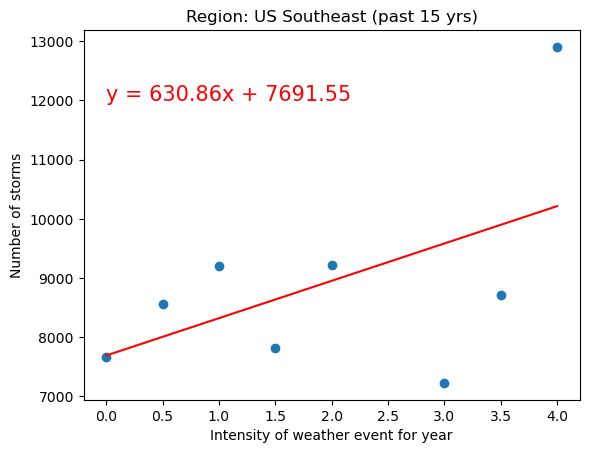

In [20]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(with_abs.index, with_abs['southeast'])
regress_values = with_abs.index * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(with_abs.index, with_abs['southeast'])

# Plot regression line
plt.plot(with_abs.index,regress_values,"r-")
plt.annotate(line_eq,(0,12000),fontsize=15,color="red")
# Print r square value
print(f"R squared: {rvalue**2}")
# Print pearsonr
print(f"Pearson-R: {round(region_corr_abs['southeast'], 2)}")
plt.ylabel("Number of storms")
plt.xlabel("Intensity of weather event for year")
plt.title("Region: US Southeast (past 15 yrs)")
plt.show()